In [3]:
import spacy
import sagas
# import spacy_procs

from spacy.lang.fr.examples import sentences
nlp = spacy.load('fr_core_news_sm')
# doc = nlp(sentences[0])
# doc = nlp("Tu donnes du fromage à ton enfant.")
doc = nlp("Tu donnes du fromage à ton enfant")
print(doc.text)
rs=[]
for token in doc:
    rs.append((token.text, token.pos_, token.dep_, token.tag_))
sagas.to_df(rs, ['text', 'pos', 'dep', 'tag'])

Tu donnes du fromage à ton enfant


,text,pos,dep,tag
0,Tu,PRON,ROOT,PRON__Number=Sing|Person=1
1,donnes,VERB,amod,VERB__Gender=Masc|Number=Sing|Tense=Past|VerbF...
2,du,DET,det,DET__Gender=Masc|Number=Sing
3,fromage,NOUN,obj,NOUN__Gender=Masc|Number=Sing
4,à,ADP,case,ADP___
5,ton,NOUN,nmod,NOUN__Gender=Masc|Number=Sing
6,enfant,NOUN,amod,NOUN__Number=Sing


In [2]:
import sagas.nlu.spacy_helper as sr
sr.get_verbs(doc)

set()

In [4]:
sents='Je suis un étudiant'
doc=nlp(sents)
for token in doc:
    print(token.text, token.pos_, token.dep_)
sr.get_verbs(doc)

Je PRON nsubj
suis AUX cop
un DET det
étudiant NOUN ROOT


set()

In [6]:
import sagas.nlu.spacy_procs as sp
sp.analyse(doc)

root: Tu pronoun
verbs+: set()
tu(amod:donner, obj:fromage)
------------
	 ⊙ Tu ROOT ☈Tu [donnes, fromage]
	 ☑ donnes amod ☈Tu []
	 2 du det ☈fromage []
	 ☑ fromage obj ☈Tu [du, ton, enfant]
	 4 à case ☈ton []
	 5 ton nmod ☈fromage [à]
	 6 enfant amod ☈fromage []
------------ noun_chunks
Tu donnes du fromage à ton enfant ☼Tu ROOT ☈Tu
------------ merge subject
root: Tu
------------
	 ⊙ Tu ROOT ☈Tu [donnes, fromage]
	 ☑ donnes amod ☈Tu []
	 2 du det ☈fromage []
	 ☑ fromage obj ☈Tu [du, ton, enfant]
	 4 à case ☈ton []
	 5 ton nmod ☈fromage [à]
	 6 enfant amod ☈fromage []


In [1]:
import sagas.nlu.procs_dependency as deps
sent="Tu donnes du fromage à ton enfant."
dp=deps.DependencyProcs()
dp.parse(sent)

(ROOT
  (SENT
    (NP (PRON Tu) (VERB donnes))
    (VN (ADP de))
    (NP (DET le) (NOUN fromage)
      (PP (ADP à)
        (NP (DET ton) (NOUN enfant))))
    (PUNCT .)))
[('ROOT', 0, 2), ('nsubj', 2, 1), ('case', 5, 3), ('det', 5, 4), ('nmod', 2, 5), ('case', 8, 6), ('nmod:poss', 8, 7), ('nmod', 2, 8), ('punct', 2, 9)]
------------ ✁
☑ ('donnes', 'VERB')
nsubj.actor: ('Tu', 'PRON')
nmod: ('fromage', 'NOUN')
nmod: ('enfant', 'NOUN')
**raw sentence: Tu donnes du fromage à ton enfant.
------------ ☼


In [2]:
dp.parse(sent)

(ROOT
  (SENT
    (NP (PRON Tu) (VERB donnes))
    (VN (ADP de))
    (NP (DET le) (NOUN fromage)
      (PP (ADP à)
        (NP (DET ton) (NOUN enfant))))
    (PUNCT .)))
[('ROOT', 0, 2), ('nsubj', 2, 1), ('case', 5, 3), ('det', 5, 4), ('nmod', 2, 5), ('case', 8, 6), ('nmod:poss', 8, 7), ('nmod', 2, 8), ('punct', 2, 9)]
------------ ✁
☑ ('donnes', 'VERB')
nsubj.actor: ('Tu', 'PRON')
nmod: ('fromage', 'NOUN')
nmod: ('enfant', 'NOUN')
**raw sentence: Tu donnes du fromage à ton enfant.
------------ ☼


In [6]:
tags=dp.nlp.pos_tag(sent)
treelog=str(dp.nlp.parse(sent))
print(treelog)

(ROOT
  (SENT
    (NP (PRON Tu) (VERB donnes))
    (VN (ADP de))
    (NP (DET le) (NOUN fromage)
      (PP (ADP à)
        (NP (DET ton) (NOUN enfant))))
    (PUNCT .)))


In [8]:
from tabulate import tabulate
table_header = ['a','rel','b']
table_data = []
tree=dp.nlp.dependency_parse(sent)
print(tree)
for node in tree:
    refindex=node[1]
    relname=node[0]
    target=node[2]
    rel=dp.explain_rel(relname)
    table_data.append((str(tags[refindex-1]), rel, str(tags[target-1])))

print(tabulate(table_data, headers=table_header, tablefmt='psql'))

[('ROOT', 0, 2), ('nsubj', 2, 1), ('case', 5, 3), ('det', 5, 4), ('nmod', 2, 5), ('case', 8, 6), ('nmod:poss', 8, 7), ('nmod', 2, 8), ('punct', 2, 9)]
+---------------------+------------------------+---------------------+
| a                   | rel                    | b                   |
|---------------------+------------------------+---------------------|
| ('.', 'PUNCT')      | ROOT                   | ('donnes', 'VERB')  |
| ('donnes', 'VERB')  | nsubj.actor            | ('Tu', 'PRON')      |
| ('fromage', 'NOUN') | case@投影              | ('de', 'ADP')       |
| ('fromage', 'NOUN') | det@限定词             | ('le', 'DET')       |
| ('donnes', 'VERB')  | nmod                   | ('fromage', 'NOUN') |
| ('enfant', 'NOUN')  | case@投影              | ('à', 'ADP')        |
| ('enfant', 'NOUN')  | nmod:poss@复合名词修饰 | ('ton', 'DET')      |
| ('donnes', 'VERB')  | nmod                   | ('enfant', 'NOUN')  |
| ('donnes', 'VERB')  | punct@符号             | ('.', 'PUNCT')      |
+-----------

text: Les 	lemma: le	upos: DET	xpos: _
text: lunettes 	lemma: lunette	upos: NOUN	xpos: _
text: que 	lemma: que	upos: PRON	xpos: _
text: tu 	lemma: il	upos: PRON	xpos: _
text: cherches 	lemma: cherche	upos: VERB	xpos: _
text: sont 	lemma: être	upos: AUX	xpos: _
text: en 	lemma: en	upos: ADP	xpos: _
text: haut 	lemma: haut	upos: NOUN	xpos: _
text: de 	lemma: de	upos: ADP	xpos: _
text: l' 	lemma: le	upos: DET	xpos: _
text: escalier 	lemma: escalier	upos: NOUN	xpos: _
text: . 	lemma: .	upos: PUNCT	xpos: _
('Les', '2', 'det')
('lunettes', '8', 'nsubj')
('que', '5', 'obj')
('tu', '5', 'nsubj')
('cherches', '2', 'acl:relcl')
('sont', '8', 'cop')
('en', '8', 'case')
('haut', '0', 'root')
('de', '11', 'case')
("l'", '11', 'det')
('escalier', '8', 'nmod')
('.', '8', 'punct')


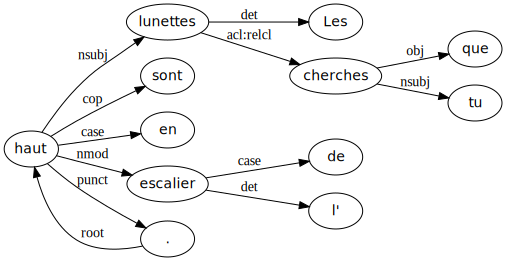

In [3]:
import sagas
sagas.dia('fr').ana_s("Les lunettes que tu cherches sont en haut de l'escalier.")

text: Tu 	lemma: il	upos: PRON	xpos: _
text: as 	lemma: avoir	upos: AUX	xpos: _
text: choisi 	lemma: choisir	upos: VERB	xpos: _
text: laquelle 	lemma: lequel	upos: PRON	xpos: _
text: tu 	lemma: il	upos: PRON	xpos: _
text: vas 	lemma: vas	upos: VERB	xpos: _
text: manger 	lemma: manger	upos: VERB	xpos: _
text: ? 	lemma: ?	upos: PUNCT	xpos: _
('Tu', '3', 'nsubj')
('as', '3', 'aux')
('choisi', '0', 'root')
('laquelle', '6', 'obj')
('tu', '6', 'nsubj')
('vas', '3', 'ccomp')
('manger', '6', 'xcomp')
('?', '3', 'punct')


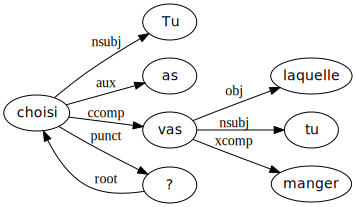

In [2]:
import sagas
sagas.dia('fr').ana_s("Tu as choisi laquelle tu vas manger ?")